In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2023-08-07-sin_hello_chat.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

,timestamp,date,hour
0,2023-08-07 17:40:28.447000+00:00,2023-08-07,17.67
1,2023-08-07 15:06:15.009000+00:00,2023-08-07,15.10
2,2023-08-07 12:50:38.013000+00:00,2023-08-07,12.83
3,2023-08-07 10:50:33.342000+00:00,2023-08-07,10.83
4,2023-08-06 21:50:46.505000+00:00,2023-08-06,21.83


Text(0, 0.5, 'Count')

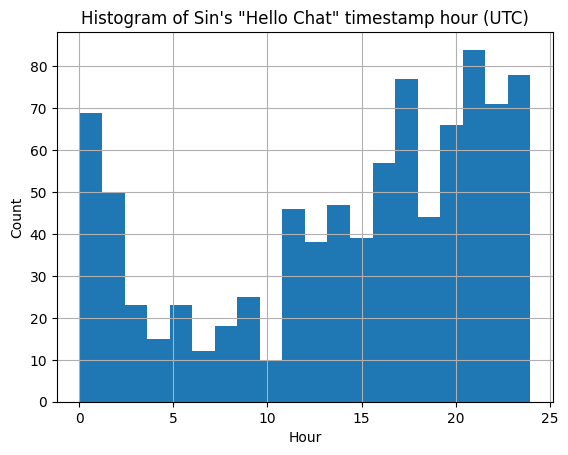

In [2]:
df.hour.hist(bins=20)
plt.title('Histogram of Sin\'s "Hello Chat" timestamp hour (UTC)')
plt.xlabel('Hour')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

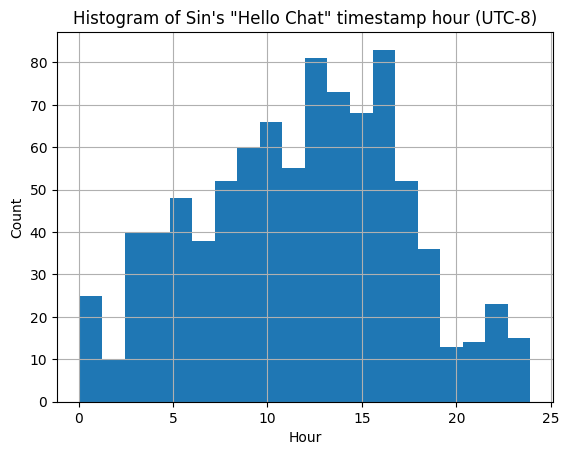

In [12]:
offset = -8
((df.hour+offset)%24).hist(bins=20)
plt.title(f'Histogram of Sin\'s "Hello Chat" timestamp hour (UTC{offset:+d})')
plt.xlabel('Hour')
plt.ylabel('Count')

In [5]:
daily_frequency = df.groupby("date").count().groupby("hour").count().reset_index()[["hour", "timestamp"]]
daily_frequency.columns = ["count", "frequency"]
daily_frequency

,count,frequency
0,1,69
1,2,85
2,3,77
3,4,45
4,5,22
5,6,8
6,7,7
7,8,2
8,9,1
9,10,1


Text(0.5, 1.0, 'Number of messages per day of the week')

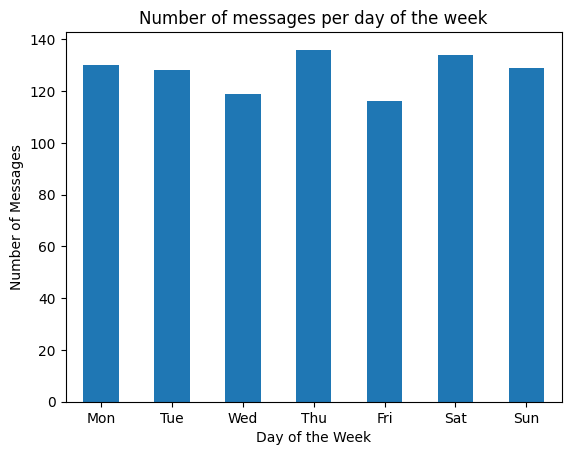

In [8]:
import numpy as np

# convert date to day of the week as a number
df['day_of_week'] = df['timestamp'].dt.dayofweek

df['day_of_week'].value_counts().sort_index().plot(kind='bar', rot=0)
# label day of the week as a string
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.title("Number of messages per day of the week")